# Preprocessing the Proba-V Dataset

The following notebook is based on the RAMS preprocessing notebook (https://github.com/EscVM/RAMS).

The following notebook provides a very flexible pipeline for processing the Proba-V Dataset. We have already split the original dataset in train validation and test. The test set is the original one of the ESA Proba-V challenge without ground-truths. The validation set is composed of all the scenes we used to evaluate our network and all significant solutions presented in literature at the time of writing.

**NB**: with the setting "train_full=True" our validation split will be ignored, and you will have a pre-processed dataset with all scenes available in the dataset. It is useful if you want to compete in the [PROBA-V Super Resolution post mortem Challenge](https://kelvins.esa.int/proba-v-super-resolution-post-mortem/home/)

**The notebook is divided in**:
- 1.0 [Dataset Loading](#section_ID)
- 2.0 [Dataset pre-processing](#preprocessing)
    - 2.1 Register dataset
    - 2.2 Select the best T LR images
- 3.0 [Visualize the Pre-Processed Datataset](#visualize)
- 4.0 [Save dataset](#save)

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# import utils and basic libraries
from utils import load_dataset,select_T_images,register_dataset
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#-------------
# Settings
#-------------
T = 9                                # number of temporal dimension
dataset_dir = '../../Dataset/probav_data/'  # input dir (train val and test split)
dataset_output_dir = '../../Dataset/'       # output dir
threshold_clean = 0.85               # percentage of clear pixel
train_full = False                   # train without a validation

<a id="loading"></a>
# 1.0 Dataset Loading

In [4]:
# train loading
X_RED_train, X_RED_train_masks, y_RED_train, y_RED_train_masks = load_dataset(base_dir=dataset_dir, 
                                                                              part="train", band="RED")
X_NIR_train, X_NIR_train_masks, y_NIR_train, y_NIR_train_masks = load_dataset(base_dir=dataset_dir,
                                                                              part="train", band="NIR")

print(f"Train RED scenes: {len(X_RED_train)} | Train RED y shape: {y_RED_train.shape}")
print(f"Train NIR scenes: {len(X_NIR_train)} | Train NIR y shape: {y_NIR_train.shape}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 396/396 [00:05<00:00, 76.84it/s]

Train RED scenes: 415 | Train RED y shape: (415, 384, 384, 1)
Train NIR scenes: 396 | Train NIR y shape: (396, 384, 384, 1)


In [5]:
# validation loading
X_RED_val, X_RED_val_masks, y_RED_val, y_RED_val_masks = load_dataset(base_dir=dataset_dir,
                                                                      part="val", band="RED")
X_NIR_val, X_NIR_val_masks, y_NIR_val, y_NIR_val_masks = load_dataset(base_dir=dataset_dir,
                                                                      part="val", band="NIR")

print(f"Val RED scenes: {len(X_RED_val)} | Val RED y shape: {y_RED_val.shape}")
print(f"Val NIR scenes: {len(X_NIR_val)} | Val NIR y shape: {y_NIR_val.shape}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:02<00:00, 76.88it/s]

Val RED scenes: 176 | Val RED y shape: (176, 384, 384, 1)
Val NIR scenes: 170 | Val NIR y shape: (170, 384, 384, 1)


In [6]:
# test loading
X_RED_test, X_RED_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="RED")
X_NIR_test, X_NIR_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="NIR")

print(f"Test RED scenes: {len(X_RED_test)}")
print(f"Test NIR scenes: {len(X_NIR_test)}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:01<00:00, 96.11it/s]

Test RED scenes: 146
Test NIR scenes: 144


<a id="preprocessing"></a>
# 2.0 Dataset Pre-Processing

## 2.1 Register dataset

In [7]:
# train registration
X_RED_train, X_RED_train_masks = register_dataset(X_RED_train, X_RED_train_masks)
X_NIR_train, X_NIR_train_masks = register_dataset(X_NIR_train, X_NIR_train_masks)

  0%|                                                                                                                                                                                                          | 0/415 [00:00<?, ?it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

  2%|████▏                                                                                                                                                                                             | 9/415 [00:05<03:33,  1.90it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  3%|██████▌                                                                                                                                                                                          | 14/415 [00:08<04:16,  1.56it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

  4%|███████▍                                                                                                                                                                                         | 16/415 [00:09<03:56,  1.69it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

  7%|████████████▌                                                                                                                                                                                    | 27/415 [00:17<04:41,  1.38it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

  7%|█████████████▍                                                                                                                                                                                   | 29/415 [00:18<04:00,  1.60it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  8%|████████████████▎                                                                                                                                                                                | 35/415 [00:23<04:30,  1.41it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

  9%|█████████████████▏                                                                                                                                                                               | 37/415 [00:24<03:48,  1.66it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 10%|██████████████████▌                                                                                                                                                       

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 12%|███████████████████████▎                                                                                                                                                                         | 50/415 [00:33<04:11,  1.45it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 13%|█████████████████████████▌                                                                                                                                                                       | 55/415 [00:36<04:00,  1.49it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 14%|██████████████████████████▉                                                                                                                                                                      | 58/415 [00:38<04:15,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 15%|█████████████████████████████▎                                                                                                                                                                   | 63/415 [00:42<03:45,  1.56it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 19%|███████████████████████████████████▊                                                                                                                                      

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 20%|█████████████████████████████████████▋                                                                                                                                                           | 81/415 [00:55<04:30,  1.24it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 20%|███████████████████████████████████████                                                                                                                                                          | 84/415 [00:57<04:12,  1.31it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 22%|█████████████████████████████████████████▊                                                                                                                                                       | 90/415 [01:02<03:52,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 22%|██████████████████████████████████████████▊                                                                                                                                                      | 92/415 [01:03<03:26,  1.56it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 23%|█████████████████████████████████████████████                                                                                                                             

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 24%|█████████████████████████████████████████████▌                                                                                                                                                   | 98/415 [01:07<04:02,  1.31it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 24%|██████████████████████████████████████████████                                                                                                                                                   | 99/415 [01:09<04:37,  1.14it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 25%|███████████████████████████████████████████████▏                                                                                                                                                | 102/415 [01:11<04:14,  1.23it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 26%|█████████████████████████████████████████████████▉                                                                                                                                              | 108/415 [01:14<02:40,  1.91it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 28%|█████████████████████████████████████████████████████▏                                                                                                                    

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 29%|███████████████████████████████████████████████████████▉                                                                                                                  

 30%|████████████████████████████████████████████████████████▉                                                                                                                                       | 123/415 [01:24<03:06,  1.57it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 31%|██████████████████████████████████████████████████████████▊                                                                                                                                     | 127/415 [01:28<03:51,  1.25it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 31%|███████████████████████████████████████████████████████████▋                                                                                                                                    | 129/415 [01:29<03:20,  1.42it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 32%|█████████████████████████████████████████████████████████████                                                                                                                                   | 132/415 [01:31<03:29,  1.35it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 33%|██████████████████████████████████████████████████████████████▍                                                                                                                                 | 135/415 [01:34<03:29,  1.34it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 33%|██████████████████████████████████████████████████████████████▉                                                                                                                                 | 136/415 [01:35<04:01,  1.16it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 33%|████████████████████████████████████████████████████████████████▎                                                                                                         

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 34%|█████████████████████████████████████████████████████████████████▋                                                                                                                              | 142/415 [01:39<03:32,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 36%|████████████████████████████████████████████████████████████████████▍                                                                                                                           | 148/415 [01:44<03:29,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 36%|█████████████████████████████████████████████████████████████████████▊                                                                                                                          | 151/415 [01:46<03:45,  1.17it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 38%|████████████████████████████████████████████████████████████████████████▋                                                                                                                       | 157/415 [01:50<02:52,  1.50it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 38%|█████████████████████████████████████████████████████████████████████████                                                                                                                       | 158/415 [01:51<03:20,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 39%|███████████████████████████████████████████████████████████████████████████▍                                                                                                                    | 163/415 [01:54<02:50,  1.47it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 40%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                                  | 168/415 [01:58<02:53,  1.42it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 42%|████████████████████████████████████████████████████████████████████████████████                                                                                          

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 44%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                     

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 45%|██████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 186/415 [02:12<02:39,  1.44it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 46%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                        | 189/415 [02:15<02:52,  1.31it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 46%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                                                        | 190/415 [02:16<03:17,  1.14it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 46%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 48%|████████████████████████████████████████████████████████████████████████████████████████████                                                                              

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 50%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 206/415 [02:28<02:52,  1.21it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 51%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                              | 212/415 [02:33<02:48,  1.20it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 225/415 [02:44<03:01,  1.04it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 242/415 [02:56<02:19,  1.24it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 251/415 [03:03<02:18,  1.19it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 253/415 [03:04<01:55,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 259/415 [03:08<01:55,  1.35it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 262/415 [03:11<02:00,  1.27it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 263/415 [03:12<02:13,  1.14it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 270/415 [03:18<02:00,  1.20it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 279/415 [03:23<01:45,  1.29it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 284/415 [03:27<01:31,  1.44it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 287/415 [03:29<01:31,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 296/415 [03:37<02:03,  1.04s/it]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 306/415 [03:45<01:28,  1.23it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 308/415 [03:46<01:16,  1.39it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 314/415 [03:50<01:23,  1.21it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 330/415 [04:03<01:12,  1.18it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 332/415 [04:04<00:58,  1.42it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 335/415 [04:06<00:53,  1.50it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 339/415 [04:09<00:59,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 351/415 [04:17<00:41,  1.56it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 354/415 [04:19<00:42,  1.42it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 366/415 [04:28<00:37,  1.30it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 369/415 [04:31<00:35,  1.30it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 381/415 [04:39<00:25,  1.34it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 384/415 [04:42<00:27,  1.14it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 387/415 [04:44<00:24,  1.14it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 389/415 [04:46<00:18,  1.39it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 390/415 [04:47<00:22,  1.12it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 392/415 [04:48<00:16,  1.39it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 397/415 [04:52<00:13,  1.29it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 404/415 [04:57<00:07,  1.53it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 406/415 [04:58<00:05,  1.65it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 410/415 [05:01<00:04,  1.17it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

  1%|█▉                                                                                                                                                                                                | 4/396 [00:02<04:20,  1.51it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

  3%|█████▊                                                                                                                                                                                           | 12/396 [00:08<04:22,  1.46it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

  3%|██████▎                                                                                                                                                                                          | 13/396 [00:09<05:13,  1.22it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  5%|█████████▎                                                                                                                                                                                       | 19/396 [00:13<05:19,  1.18it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

  6%|██████████▋                                                                                                                                                                                      | 22/396 [00:16<04:41,  1.33it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

  8%|███████████████▌                                                                                                                                                                                 | 32/396 [00:24<04:44,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  9%|██████████████████                                                                                                                                                        

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 13%|████████████████████████▎                                                                                                                                                                        | 50/396 [00:37<04:29,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 13%|█████████████████████████▎                                                                                                                                                                       | 52/396 [00:38<03:48,  1.51it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 14%|██████████████████████████▊                                                                                                                                                                      | 55/396 [00:40<03:58,  1.43it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 15%|████████████████████████████▎                                                                                                                                                                    | 58/396 [00:42<04:14,  1.33it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 16%|███████████████████████████████▏                                                                                                                                                                 | 64/396 [00:47<04:36,  1.20it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 17%|████████████████████████████████▋                                                                                                                                                                | 67/396 [00:50<04:37,  1.19it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 18%|███████████████████████████████████▌                                                                                                                                                             | 73/396 [00:54<04:01,  1.34it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 21%|█████████████████████████████████████████▍                                                                                                                                                       | 85/396 [01:03<03:28,  1.49it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 22%|██████████████████████████████████████████▍                                                                                                                                                      | 87/396 [01:04<03:13,  1.60it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 23%|█████████████████████████████████████████████▎                                                                                                                                                   | 93/396 [01:09<03:53,  1.30it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 24%|██████████████████████████████████████████████▎                                                                                                                                                  | 95/396 [01:10<03:39,  1.37it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 24%|███████████████████████████████████████████████▎                                                                                                                                                 | 97/396 [01:11<03:06,  1.61it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 26%|████████████████████████████████████████████████▉                                                                                                                                               | 101/396 [01:15<04:11,  1.17it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 26%|██████████████████████████████████████████████████▍                                                                                                                                             | 104/396 [01:17<04:03,  1.20it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 28%|█████████████████████████████████████████████████████▎                                                                                                                                          | 110/396 [01:22<03:40,  1.30it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 32%|██████████████████████████████████████████████████████████████                                                                                                                                  | 128/396 [01:37<03:40,  1.22it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 34%|████████████████████████████████████████████████████████████████▍                                                                                                                               | 133/396 [01:40<03:16,  1.34it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 35%|██████████████████████████████████████████████████████████████████▉                                                                                                                             | 138/396 [01:44<02:57,  1.46it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 40%|█████████████████████████████████████████████████████████████████████████████                                                                                             

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 41%|██████████████████████████████████████████████████████████████████████████████                                                                                                                  | 161/396 [02:00<02:23,  1.64it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 41%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                | 164/396 [02:03<02:44,  1.41it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 42%|████████████████████████████████████████████████████████████████████████████████                                                                                                                | 165/396 [02:04<03:15,  1.18it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 43%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                                             | 170/396 [02:07<02:41,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 44%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                     

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 45%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                                         | 179/396 [02:13<02:29,  1.45it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 46%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                       | 182/396 [02:15<02:42,  1.31it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 49%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                                  | 194/396 [02:24<03:04,  1.09it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 52%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 206/396 [02:34<02:28,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                           | 208/396 [02:35<02:02,  1.54it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 219/396 [02:44<02:16,  1.30it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 226/396 [02:50<02:07,  1.33it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                | 231/396 [02:53<01:50,  1.50it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 243/396 [03:01<01:43,  1.48it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 248/396 [03:05<01:54,  1.29it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 254/396 [03:10<01:56,  1.21it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 257/396 [03:13<01:53,  1.23it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 262/396 [03:16<01:39,  1.34it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 265/396 [03:19<01:45,  1.24it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 270/396 [03:24<01:57,  1.08it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 277/396 [03:30<01:45,  1.13it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 287/396 [03:38<01:36,  1.13it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 292/396 [03:42<01:17,  1.34it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 302/396 [03:49<01:08,  1.37it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 322/396 [04:05<01:00,  1.23it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 327/396 [04:08<00:51,  1.35it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 329/396 [04:09<00:45,  1.48it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 331/396 [04:11<00:41,  1.59it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 335/396 [04:14<00:49,  1.23it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 339/396 [04:18<00:46,  1.22it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 341/396 [04:19<00:36,  1.50it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 348/396 [04:25<00:36,  1.30it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 356/396 [04:31<00:28,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 360/396 [04:34<00:28,  1.26it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 363/396 [04:37<00:24,  1.32it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 366/396 [04:39<00:25,  1.17it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 386/396 [04:56<00:08,  1.15it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 389/396 [04:58<00:05,  1.26it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

In [8]:
# validation registration
X_RED_val, X_RED_val_masks = register_dataset(X_RED_val, X_RED_val_masks)
X_NIR_val, X_NIR_val_masks = register_dataset(X_NIR_val, X_NIR_val_masks)

  0%|                                                                                                                                                                                                          | 0/176 [00:00<?, ?it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  7%|█████████████▏                                                                                                                                                            

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 10%|███████████████████▋                                                                                                                                                                             | 18/176 [00:12<01:21,  1.94it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 11%|████████████████████▊                                                                                                                                                                            | 19/176 [00:13<01:42,  1.52it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 14%|██████████████████████████▎                                                                                                                                                                      | 24/176 [00:16<01:35,  1.60it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 16%|███████████████████████████████▊                                                                                                                                                                 | 29/176 [00:19<01:44,  1.41it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 18%|█████████████████████████████████▉                                                                                                                                        

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 24%|██████████████████████████████████████████████                                                                                                                                                   | 42/176 [00:28<01:36,  1.39it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 29%|███████████████████████████████████████████████████████▉                                                                                                                                         | 51/176 [00:35<01:20,  1.56it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 31%|███████████████████████████████████████████████████████████▏                                                                                                              

 31%|████████████████████████████████████████████████████████████▎                                                                                                                                    | 55/176 [00:38<01:38,  1.23it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 33%|███████████████████████████████████████████████████████████████▌                                                                                                                                 | 58/176 [00:40<01:31,  1.29it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 41%|████████████████████████████████████████████████████████████████████████████████                                                                                                                 | 73/176 [00:51<01:13,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 42%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                        

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 44%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 78/176 [00:56<01:22,  1.19it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 46%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                        | 81/176 [00:58<01:18,  1.21it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 48%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 84/176 [01:00<01:11,  1.29it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 101/176 [01:14<00:58,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 103/176 [01:15<00:46,  1.57it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 114/176 [01:22<00:40,  1.53it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 125/176 [01:31<00:39,  1.29it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 133/176 [01:37<00:28,  1.49it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 142/176 [01:42<00:19,  1.78it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 146/176 [01:46<00:23,  1.26it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 148/176 [01:47<00:18,  1.51it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 151/176 [01:49<00:17,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 159/176 [01:53<00:09,  1.82it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 166/176 [01:58<00:06,  1.65it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  2%|████▌                                                                                                                                                                                             | 4/170 [00:03<02:05,  1.32it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

  3%|█████▋                                                                                                                                                                                            | 5/170 [00:04<02:21,  1.17it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  5%|█████████▏                                                                                                                                                                                        | 8/170 [00:06<02:10,  1.24it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  6%|███████████▎                                                                                                                                                                                     | 10/170 [00:07<01:44,  1.53it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  6%|████████████▍                                                                                                                                                                                    | 11/170 [00:08<02:08,  1.24it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  9%|██████████████████▏                                                                                                                                                                              | 16/170 [00:12<01:49,  1.41it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 11%|████████████████████▍                                                                                                                                                     

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 15%|█████████████████████████████▌                                                                                                                                                                   | 26/170 [00:19<01:55,  1.24it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 21%|████████████████████████████████████████▊                                                                                                                                                        | 36/170 [00:26<01:41,  1.32it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 24%|██████████████████████████████████████████████▌                                                                                                                                                  | 41/170 [00:29<01:28,  1.46it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 31%|███████████████████████████████████████████████████████████                                                                                                                                      | 52/170 [00:36<01:19,  1.49it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 34%|████████████████████████████████████████████████████████████████▋                                                                                                                                | 57/170 [00:39<01:17,  1.46it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 35%|████████████████████████████████████████████████████████████████████                                                                                                      

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 39%|████████████████████████████████████████████████████████████████████████████                                                                                                                     | 67/170 [00:47<01:21,  1.26it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 41%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 70/170 [00:50<01:18,  1.27it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 42%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                                | 71/170 [00:51<01:26,  1.14it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 45%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                          | 76/170 [00:54<01:10,  1.34it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 46%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                        | 78/170 [00:56<01:25,  1.07it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 95/170 [01:09<00:58,  1.27it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 101/170 [01:13<00:53,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 106/170 [01:18<00:58,  1.09it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 108/170 [01:19<00:47,  1.32it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 115/170 [01:24<00:38,  1.42it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 123/170 [01:31<00:34,  1.36it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 129/170 [01:36<00:35,  1.15it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 133/170 [01:39<00:26,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 136/170 [01:41<00:27,  1.24it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 141/170 [01:45<00:22,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 157/170 [01:59<00:11,  1.10it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 168/170 [02:05<00:01,  1.57it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

In [9]:
# test registration
X_RED_test, X_RED_test_masks = register_dataset(X_RED_test, X_RED_test_masks)
X_NIR_test, X_NIR_test_masks = register_dataset(X_NIR_test, X_NIR_test_masks)

  0%|                                                                                                                                                                                                          | 0/146 [00:00<?, ?it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
  7%|█████████████▏                                                                                                                                                                                   | 10/146 [00:06<01:49,  1.24it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 10%|███████████████████▊                                                                                                                                                                             | 15/146 [00:10<01:28,  1.48it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 16%|██████████████████████████████▍                                                                                                                                           

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 18%|██████████████████████████████████▎                                                                                                                                                              | 26/146 [00:17<01:27,  1.37it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 21%|████████████████████████████████████████▉                                                                                                                                                        | 31/146 [00:21<01:24,  1.36it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 35%|███████████████████████████████████████████████████████████████████▍                                                                                                                             | 51/146 [00:35<01:06,  1.42it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 37%|███████████████████████████████████████████████████████████████████████▍                                                                                                  

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 42%|████████████████████████████████████████████████████████████████████████████████▋                                                                                         

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 44%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                     

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 47%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                     | 69/146 [00:48<00:53,  1.44it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 49%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 51%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                             | 75/146 [00:53<00:52,  1.37it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 83/146 [00:58<00:44,  1.40it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 95/146 [01:07<00:40,  1.26it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 110/146 [01:19<00:32,  1.12it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 120/146 [01:25<00:17,  1.47it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 129/146 [01:31<00:10,  1.61it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 132/146 [01:33<00:09,  1.43it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 138/146 [01:38<00:05,  1.37it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 10%|████████████████████                                                                                                                                                                             | 15/144 [00:10<01:30,  1.42it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 15%|████████████████████████████▏                                                                                                                                                                    | 21/144 [00:14<01:36,  1.27it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 19%|█████████████████████████████████████▌                                                                                                                                                           | 28/144 [00:19<01:16,  1.52it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

 21%|████████████████████████████████████████▏                                                                                                                                                        | 30/144 [00:20<01:09,  1.63it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 22%|██████████████████████████████████████████▉                                                                                                                                                      | 32/144 [00:21<01:05,  1.72it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 23%|████████████████████████████████████████████▏                                                                                                                                                    | 33/144 [00:22<01:23,  1.33it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 25%|████████████████████████████████████████████████▎                                                                                                                         

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 30%|█████████████████████████████████████████████████████████▋                                                                                                                                       | 43/144 [00:29<01:07,  1.50it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 32%|█████████████████████████████████████████████████████████████▋                                                                                                            

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 40%|████████████████████████████████████████████████████████████████████████████▍                                                                                                                    | 57/144 [00:39<01:00,  1.44it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 44%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                                            | 63/144 [00:43<01:00,  1.34it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 52%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 75/144 [00:52<00:53,  1.28it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 78/144 [00:54<00:54,  1.21it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 81/144 [00:57<00:48,  1.30it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 91/144 [01:04<00:39,  1.34it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 104/144 [01:12<00:26,  1.54it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 126/144 [01:29<00:14,  1.24it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in ve

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 143/144 [01:42<00:00,  1.19it/s]C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
C:\projekty\piunet\venv\lib\site-packages\skimage\feature\__init__.py:34: skimage_deprecation: Function ``masked_register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase

## 2.2 Select the best T LR images

In [10]:
# select T train
X_RED_train, remove_indexes_RED_train = select_T_images(X_RED_train, X_RED_train_masks,
                                                                     T, thr=threshold_clean)
X_NIR_train, remove_indexes_NIR_train = select_T_images(X_NIR_train, X_NIR_train_masks, 
                                                                     T, thr=threshold_clean)

print(f"Train RED shape: {X_RED_train.shape}")
print(f"Train NIR shape: {X_NIR_train.shape}")
print(f"Train indexes removed RED: {remove_indexes_RED_train}")
print(f"Train indexes removed NIR: {remove_indexes_NIR_train}")

 43%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                                             | 170/396 [00:00<00:00, 550.63it/s]

Removing number 48
Removing number 168


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 349/396 [00:00<00:00, 579.28it/s]

Removing number 222


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 396/396 [00:00<00:00, 569.20it/s]


Train RED shape: (415, 128, 128, 9)
Train NIR shape: (393, 128, 128, 9)
Train indexes removed RED: []
Train indexes removed NIR: [48, 168, 222]


In [11]:
# delete awful scenes training
y_RED_train = np.delete(y_RED_train, remove_indexes_RED_train, axis=0)
y_RED_train_masks = np.delete(y_RED_train_masks, remove_indexes_RED_train, axis=0)
y_NIR_train = np.delete(y_NIR_train, remove_indexes_NIR_train, axis=0)
y_NIR_train_masks = np.delete(y_NIR_train_masks, remove_indexes_NIR_train, axis=0)

print(f"Train RED y shape: {y_RED_train.shape}")
print(f"Train NIR y shape: {y_NIR_train.shape}")

Train RED y shape: (415, 384, 384, 1)
Train NIR y shape: (393, 384, 384, 1)


In [12]:
# select T validation
X_RED_val, remove_indexes_RED_val = select_T_images(X_RED_val, X_RED_val_masks, 
                                                                 T, thr=threshold_clean)
X_NIR_val, remove_indexes_NIR_val = select_T_images(X_NIR_val, X_NIR_val_masks,
                                                                 T, thr=threshold_clean)

print(f"Val RED shape: {X_RED_train.shape}")
print(f"Val NIR shape: {X_NIR_train.shape}")
print(f"Val indexes removed RED: {remove_indexes_RED_val}")
print(f"Val indexes removed NIR: {remove_indexes_NIR_val}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 561.08it/s]

Val RED shape: (415, 128, 128, 9)
Val NIR shape: (393, 128, 128, 9)
Val indexes removed RED: []
Val indexes removed NIR: []


In [13]:
# delete awful scenes validation
y_RED_val = np.delete(y_RED_val, remove_indexes_RED_val, axis=0)
y_RED_val_masks = np.delete(y_RED_val_masks, remove_indexes_RED_val, axis=0)
y_NIR_val = np.delete(y_NIR_val, remove_indexes_NIR_val, axis=0)
y_NIR_val_masks = np.delete(y_NIR_val_masks, remove_indexes_NIR_val, axis=0)

print(f"Val RED y shape: {y_RED_val.shape}")
print(f"Val NIR y shape: {y_NIR_val.shape}")

Val RED y shape: (176, 384, 384, 1)
Val NIR y shape: (170, 384, 384, 1)


In [14]:
# select T test
X_RED_test, _ = select_T_images(X_RED_test, X_RED_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can't remove scenes from testing dataset
X_NIR_test, _ = select_T_images(X_NIR_test, X_NIR_test_masks,
                                                  T, thr=threshold_clean, remove_bad=False) # we can only pick the best T
print(f"Test RED shape: {X_RED_test.shape}")
print(f"Test NIR shape: {X_NIR_test.shape}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 565.22it/s]

Test RED shape: (146, 128, 128, 9)
Test NIR shape: (144, 128, 128, 9)


In [15]:
if train_full:
    X_RED_train = np.concatenate((X_RED_train, X_RED_val))
    X_NIR_train = np.concatenate((X_NIR_train, X_NIR_val))
    
    y_RED_train = np.concatenate((y_RED_train, y_RED_val))
    y_NIR_train = np.concatenate((y_NIR_train, y_NIR_val))
    
    y_RED_train_masks = np.concatenate((y_RED_train_masks, y_RED_val_masks))
    y_NIR_train_masks = np.concatenate((y_NIR_train_masks, y_NIR_val_masks))
    
print(f"Train RED X shape: {X_RED_train.shape} | Train RED y shape: {y_RED_train.shape}")
print(f"Train NIR X shape: {X_NIR_train.shape} | Train NIR y shape: {y_NIR_train.shape}")

Train RED X shape: (415, 128, 128, 9) | Train RED y shape: (415, 384, 384, 1)
Train NIR X shape: (393, 128, 128, 9) | Train NIR y shape: (393, 384, 384, 1)


<a id="visualize"></a>
# 3.0 Visualize the Pre-Processed Datataset

In [16]:
#-------------
# Settings
#-------------
index = 30
band = 'NIR'

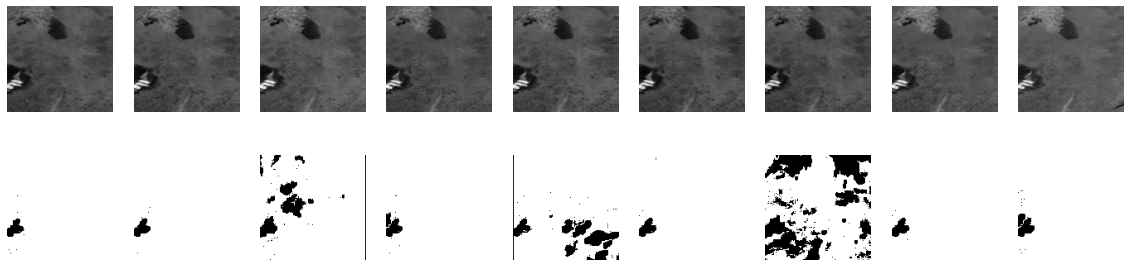

In [21]:
fig, ax = plt.subplots(2, T, figsize=(20,5))

if band == "NIR":
    for i in range(T):
        ax[0,i].imshow(X_NIR_train[index][...,i], cmap = 'gray')
        ax[0,i].axis('off')
        ax[1,i].imshow(X_NIR_train_masks[index][...,i], cmap = 'gray')
        ax[1,i].axis('off')
else:
    for i in range(T):
        ax[0,i].imshow(X_RED_train[index][...,i], cmap = 'gray')
        ax[0,i].axis('off')
        ax[1,i].imshow(X_RED_train_masks[index][...,i], cmap = 'gray')
        ax[1,i].axis('off')

<a id="save"></a>
# 4.0 Save dataset

In [17]:
if not os.path.isdir(dataset_output_dir):
    os.mkdir(dataset_output_dir)

In [18]:
# save training
np.save(os.path.join(dataset_output_dir, 'X_RED_train.npy'), X_RED_train)
np.save(os.path.join(dataset_output_dir, 'X_NIR_train.npy'), X_NIR_train)

np.save(os.path.join(dataset_output_dir, 'y_RED_train.npy'), y_RED_train)
np.save(os.path.join(dataset_output_dir, 'y_NIR_train.npy'), y_NIR_train)

np.save(os.path.join(dataset_output_dir, 'y_RED_train_masks.npy'), y_RED_train_masks)
np.save(os.path.join(dataset_output_dir, 'y_NIR_train_masks.npy'), y_NIR_train_masks)

In [19]:
# save validation
if not train_full:
    np.save(os.path.join(dataset_output_dir, 'X_RED_val.npy'), X_RED_val)
    np.save(os.path.join(dataset_output_dir, 'X_NIR_val.npy'), X_NIR_val)

    np.save(os.path.join(dataset_output_dir, 'y_RED_val.npy'), y_RED_val)
    np.save(os.path.join(dataset_output_dir, 'y_NIR_val.npy'), y_NIR_val)

    np.save(os.path.join(dataset_output_dir, 'y_RED_val_masks.npy'), y_RED_val_masks)
    np.save(os.path.join(dataset_output_dir, 'y_NIR_val_masks.npy'), y_NIR_val_masks)

In [20]:
# save test
np.save(os.path.join(dataset_output_dir, 'X_RED_test.npy'), X_RED_test)
np.save(os.path.join(dataset_output_dir, 'X_NIR_test.npy'), X_NIR_test)